<a href="https://colab.research.google.com/github/aritrasen87/LLM/blob/main/RouteLLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

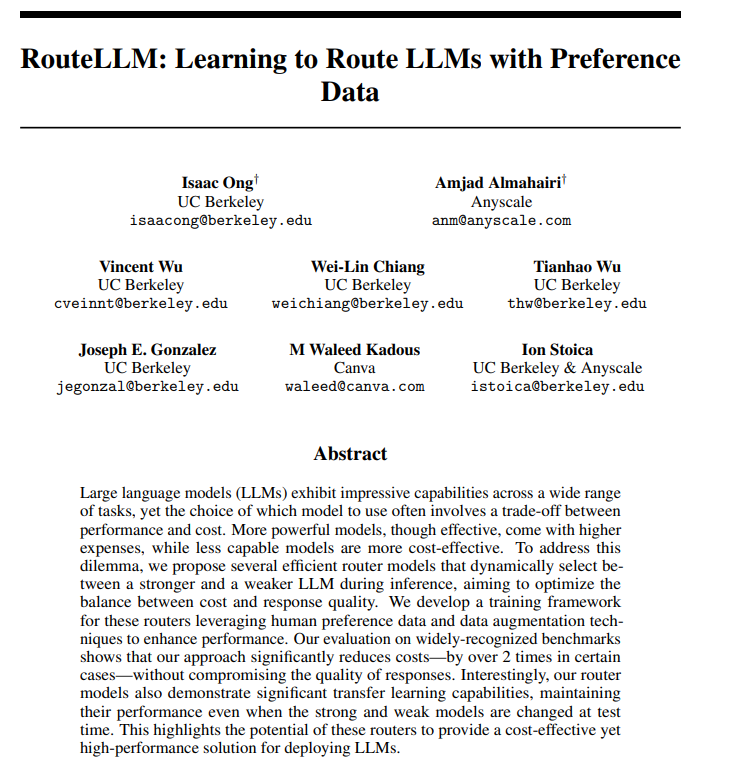

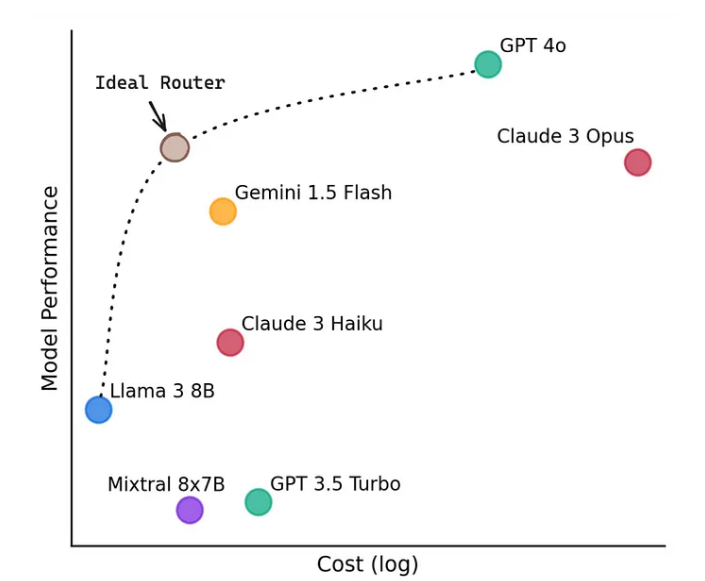

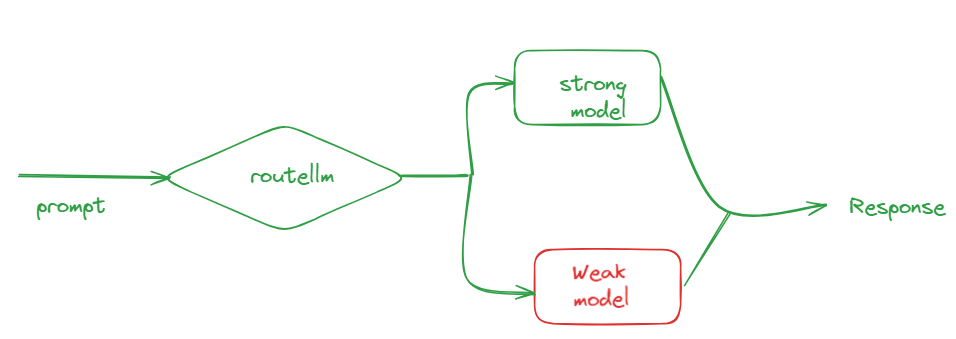

But how does RouteLLM distinguish between these different levels of complexity and route queries effectively?

This is where the concept of ***preference data*** comes into play. Imagine you present the same query to both a strong and weak LLM and ask a human judge to rate the quality of each response. This pairwise comparison forms the basis of preference data, allowing RouteLLM to learn which model is better suited for specific types of queries.



Training the router:


1. Similarity-Weighted (SW) Ranking: This method relies on calculating a “similarity score” between a new query and the queries present in the training data. This score helps determine which model is likely to perform better based on previous comparisons for similar questions.

2. Matrix Factorization: This technique uncovers hidden patterns in the preference data by representing models and queries as points in a multi-dimensional space. By analyzing the relationships between these points, the model learns a scoring function that predicts how well a particular model will perform on a given query.

3. BERT Classifier: Utilizing the power of pre-trained language models like BERT, this approach classifies queries based on their predicted winning model.

4. Causal LLM Classifier: The LLM learns to predict the probability of a model winning given a query, essentially “reasoning” its way through the routing decision.

Source: https://ai.gopubby.com/routellm-routing-efficiently-between-llms-2eecfb7a9124

In [ ]:
! pip install "routellm[serve,eval]" --q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.0/337.0 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 408.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━

In [ ]:
from google.colab import userdata
import os

os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_KEY')
os.environ["TOGETHERAI_API_KEY"] = userdata.get('TOGETHER_KEY')
os.environ["GEMINI_API_KEY"] = userdata.get('GEMINI_KEY')

In [ ]:

from routellm.controller import Controller
from litellm import completion

client = Controller(
  routers=["mf"],
  strong_model="gpt-4o-mini",
  weak_model="gemini/gemini-1.5-flash"
  #weak_model="together_ai/togethercomputer/Llama-2-7B-32K-Instruct",
  #weak_model="ollama_chat/llama3",
)

model.safetensors:   0%|          | 0.00/820k [00:00<?, ?B/s]

In [ ]:
response = client.chat.completions.create(
  # This tells RouteLLM to use the MF router with a cost threshold of 0.11593
  model="router-mf-0.11593",
  messages=[
    {"role": "user", "content": "Hi, tell me a joke on AI"}
  ]
)

message_content = response['choices'][0]['message']['content']
model_name = response['model']

print(f"Message content: {message_content}")
print(f"Model name: {model_name}")

Message content: Why did the AI get a job at the library? 

Because it was a real bookworm! 📚🧠  

Model name: gemini-1.5-flash


In [ ]:
response = client.chat.completions.create(
  # This tells RouteLLM to use the MF router with a cost threshold of 0.11593
  model="router-mf-0.11593",
  messages=[
    {"role": "user", "content": "Write a python code for Snake games"}
  ]
)

message_content = response['choices'][0]['message']['content']
model_name = response['model']

print(f"Message content: {message_content}")
print(f"Model name: {model_name}")

Message content: Creating a simple Snake game in Python can be done using the `pygame` library. Below is a sample code to create a basic Snake game. Make sure you have the `pygame` library installed. You can install it using pip if you haven't done so:

```bash
pip install pygame
```

Here's a simple implementation of the Snake game:

```python
import pygame
import time
import random

# Initialize pygame
pygame.init()

# Colors
white = (255, 255, 255)
yellow = (255, 255, 102)
black = (0, 0, 0)
red = (213, 50, 80)
green = (0, 255, 0)
blue = (50, 153, 213)

# Screen dimensions
width = 600
height = 400

# Create display
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption('Snake Game')

# Game clock
clock = pygame.time.Clock()

# Snake block size
snake_block = 10
snake_speed = 15

# Font styles
font_style = pygame.font.SysFont(None, 50)
score_font = pygame.font.SysFont(None, 35)

def our_snake(snake_block, snake_list):
    for x in snake_list:
        pygame.draw.r

### Threshold Calibration

Each routing request has a cost threshold that controls the tradeoff between cost and quality. We should calibrate this based on the types of queries we receive to maximize routing performance. As an example, let's calibrate our threshold for 50% gpt-40-mini calls using data from Chatbot Arena.

In [ ]:
! python -m routellm.calibrate_threshold --routers mf --strong-model-pct 0.5 --config config.example.yaml

Generating train split: 100% 57477/57477 [00:00<00:00, 1394881.71 examples/s]
For 50.0% strong model calls for mf, threshold = 0.11593
